## Objective: To find value of a player which would vary based on different factors

### Usage: This model would be helpful for clubs when they try to sign a player having certain factors, so depending upon their requirement they can find an estimated value of player

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

C:\Users\yasha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('fifa_eda.csv')

In [3]:
a = pd.DataFrame(df['Contract Valid Until'].str.split('-'))

In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [5]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [6]:
# dropping ID and contract column as they may be irrelevant

df=df.drop(columns=['ID','Contract Valid Until'],axis=1)

In [7]:
# checking the dimensions of dataset after removing the above 2 columns

df.shape

(18207, 16)

In [8]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,5.583333,159.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,6.166667,183.0,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,5.750000,150.0,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,6.333333,168.0,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,5.750000,134.0,143.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,6.250000,170.0,113.0
18204,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,5.666667,148.0,165.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,5.833333,154.0,143.0


In [9]:
# checking all the columns in the dataset

df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves',
       'Position', 'Joined', 'Height', 'Weight', 'Release Clause'],
      dtype='object')

In [10]:
# checking first 5 rows

df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,5.583333,159.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,6.166667,183.0,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,5.750000,150.0,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,6.333333,168.0,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,5.916667,154.0,196400.0


In [11]:
# checking datatypes of columns

df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

In [12]:
# checking the number of non null counts out of total rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     17955 non-null  float64
 7   Wage                      18207 non-null  float64
 8   Preferred Foot            18207 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Skill Moves               18159 non-null  float64
 11  Position                  18207 non-null  object 
 12  Joined                    18207 non-null  int64  
 13  Height                    18207 non-null  float64
 14  Weight

In [13]:
# null values can be seen from above info

df.isnull().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [14]:
df.dropna(inplace=True,axis=0)

In [15]:
df.shape

(17907, 16)

### EDA

In [16]:
# plotting boxplot on continuous numerical columns to check outliers

In [17]:
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000
mean,25.095605,66.239571,71.335232,2450.132909,9.887753,1.113699,2.363042,2016.429553,5.946711,165.964316,4585.060974
std,4.660388,6.926818,6.137251,5633.206685,22.148656,0.395193,0.756256,2.027399,0.220812,15.602524,10719.096361
min,16.000000,46.000000,48.000000,10.000000,1.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,563.000000
50%,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


<AxesSubplot:xlabel='Potential'>

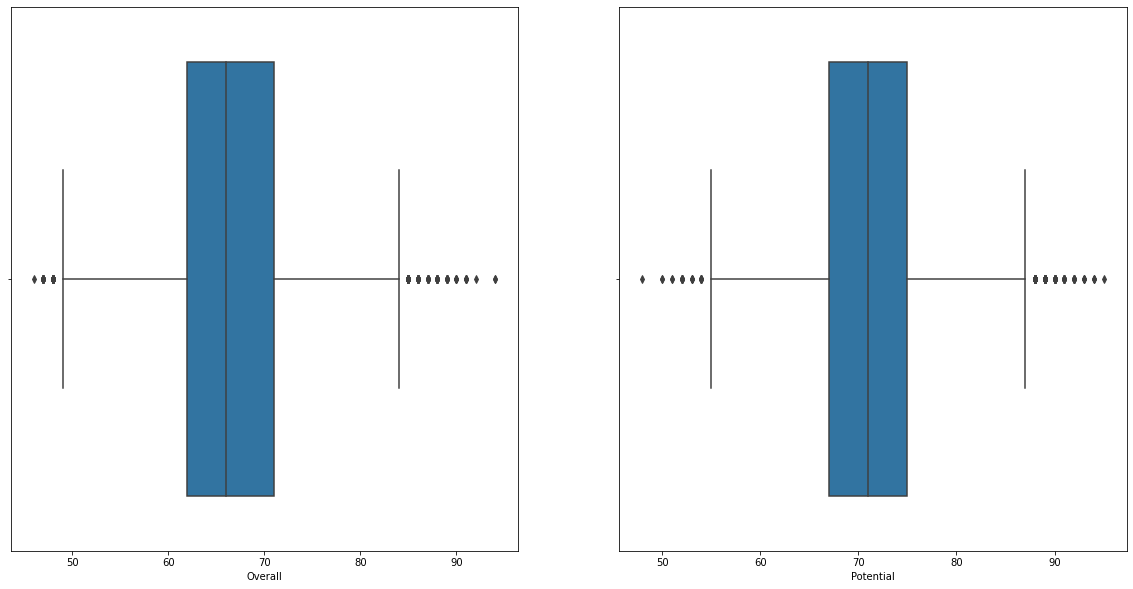

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['Overall'])

plt.subplot(1,2,2)
sns.boxplot(df['Potential'])

Text(0.5, 1.0, 'Value in Million Euros')

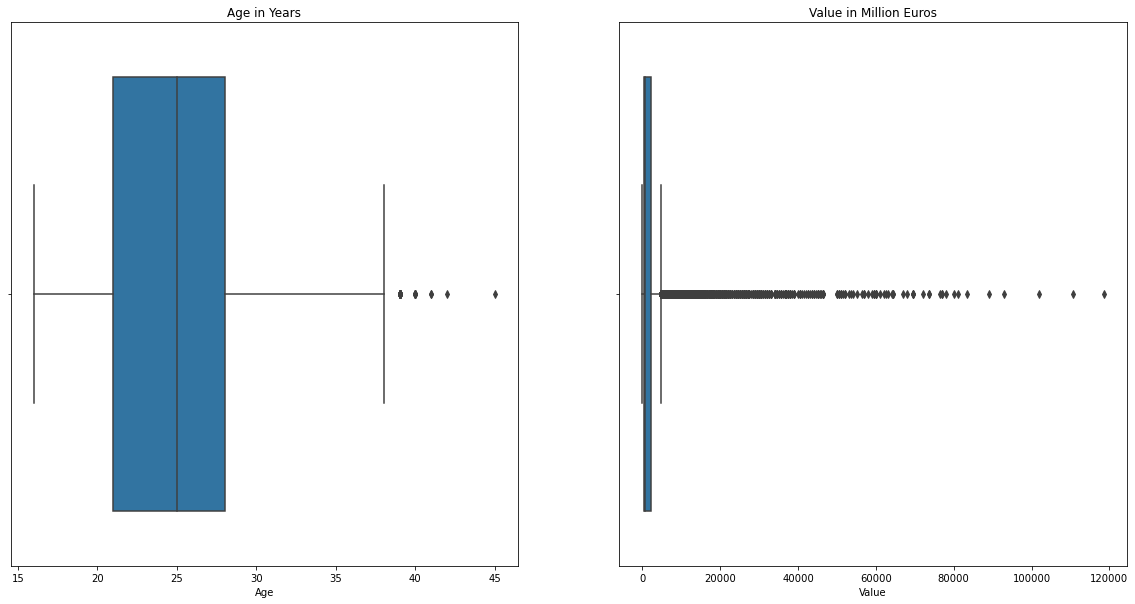

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.title('Age in Years')

plt.subplot(1,2,2)
sns.boxplot(df['Value'])
plt.title('Value in Million Euros')

Text(0.5, 1.0, 'Release Clause in Million Euros')

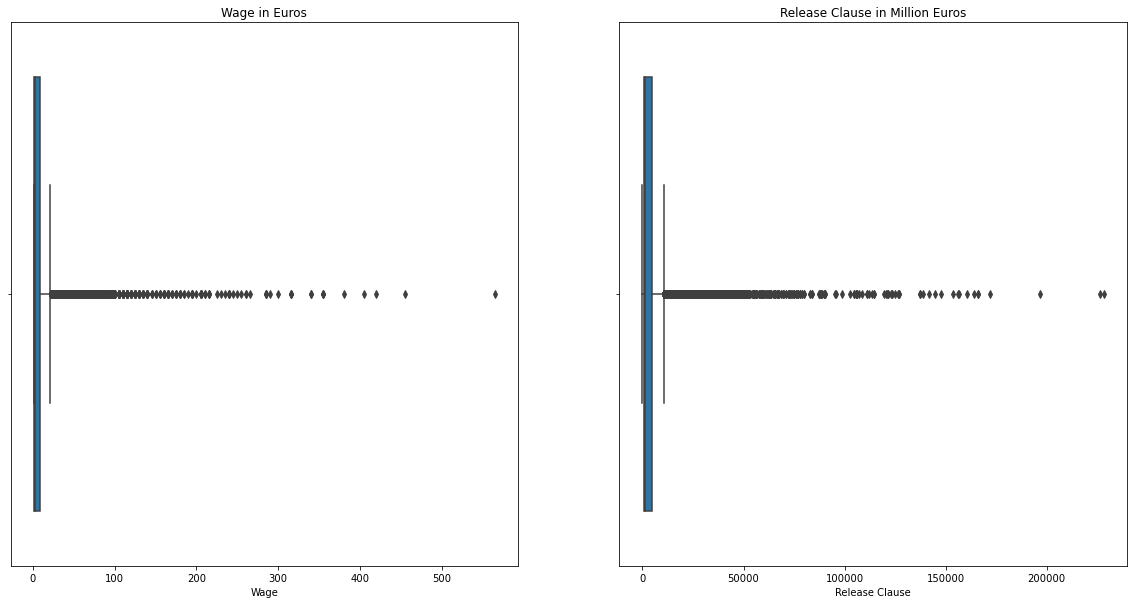

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['Wage'])
plt.title('Wage in Euros')

plt.subplot(1,2,2)
sns.boxplot(df['Release Clause'])
plt.title('Release Clause in Million Euros')

Text(0.5, 1.0, 'Weight in lbs')

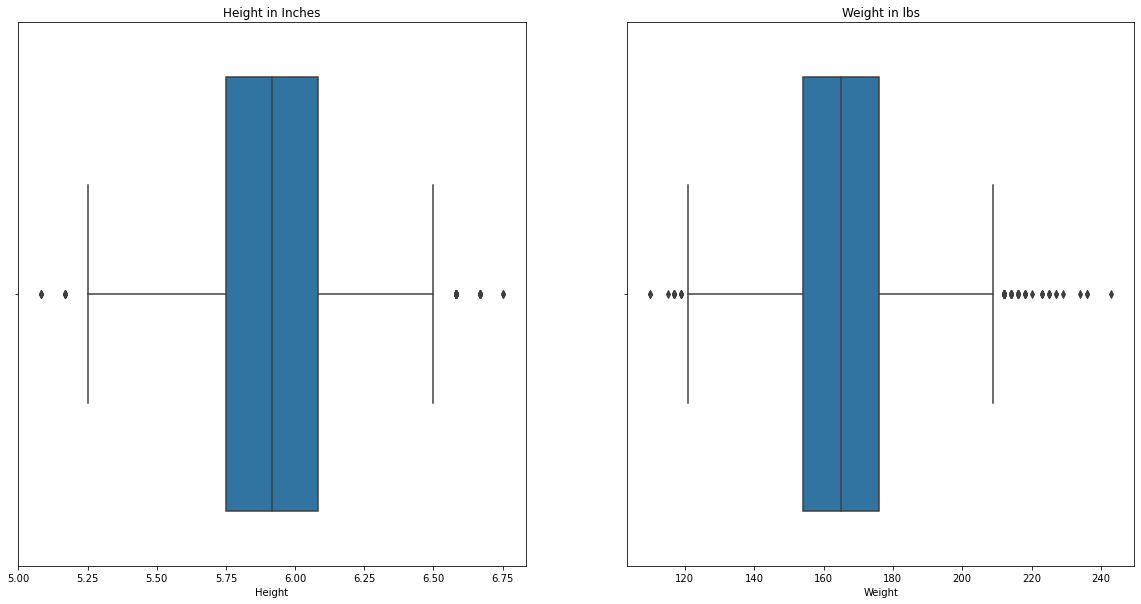

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['Height'])
plt.title('Height in Inches')

plt.subplot(1,2,2)
sns.boxplot(df['Weight'])
plt.title('Weight in lbs')

In [22]:
# removing outliers

In [23]:
df_num=df.select_dtypes(include='number')

In [24]:
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
lb=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)

In [25]:
# lower bound for numerical columns

lb

Age                           10.50000
Overall                       48.50000
Potential                     55.00000
Value                      -2337.50000
Wage                         -11.00000
International Reputation       1.00000
Skill Moves                    0.50000
Joined                      2013.00000
Height                         5.25000
Weight                       121.00000
Release Clause             -5470.09121
dtype: float64

In [26]:
# upper bound for numerical columns

ub

Age                            38.500000
Overall                        84.500000
Potential                      87.000000
Value                        4762.500000
Wage                           21.000000
International Reputation        1.000000
Skill Moves                     4.500000
Joined                       2021.000000
Height                          6.583333
Weight                        209.000000
Release Clause              10618.152016
dtype: float64

In [27]:
# removing outliers from all respective columns

In [28]:
df=df[~((df_num<lb)|(df_num>ub)).any(axis=1)]

In [29]:
# as seen dimensions have been reduced by approx 5k after removing outlier records

df.shape

(13800, 16)

In [30]:
# boxplots after removing outliers

<AxesSubplot:xlabel='Potential'>

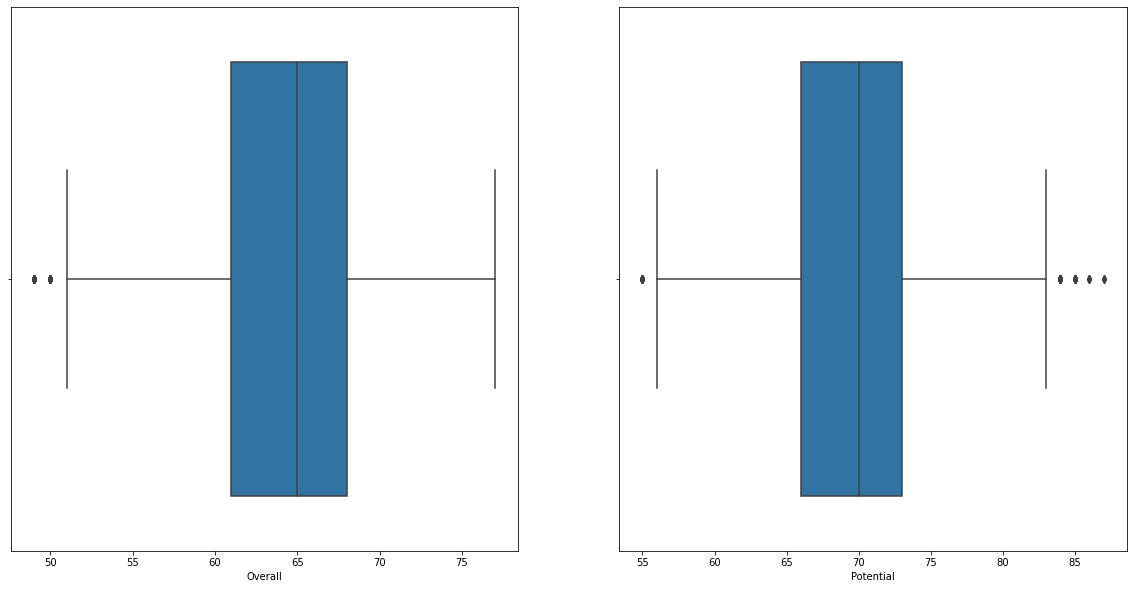

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['Overall'])

plt.subplot(1,2,2)
sns.boxplot(df['Potential'])

Text(0.5, 1.0, 'Value in Million Euros')

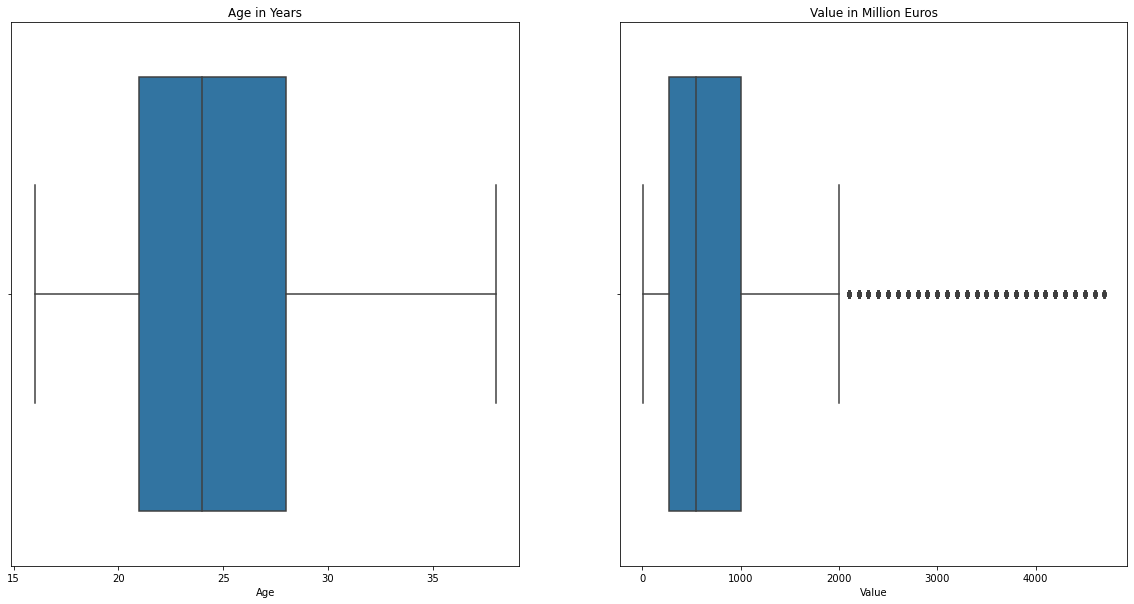

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.title('Age in Years')

plt.subplot(1,2,2)
sns.boxplot(df['Value'])
plt.title('Value in Million Euros')

Text(0.5, 1.0, 'Release Clause in Million Euros')

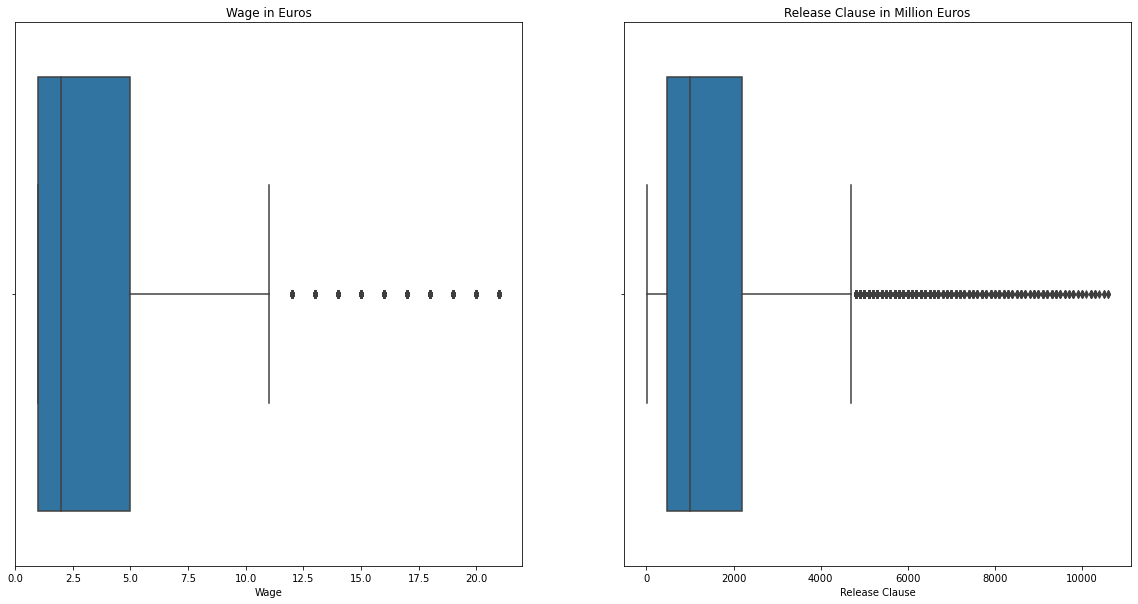

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['Wage'])
plt.title('Wage in Euros')

plt.subplot(1,2,2)
sns.boxplot(df['Release Clause'])
plt.title('Release Clause in Million Euros')

Text(0.5, 1.0, 'Weight in lbs')

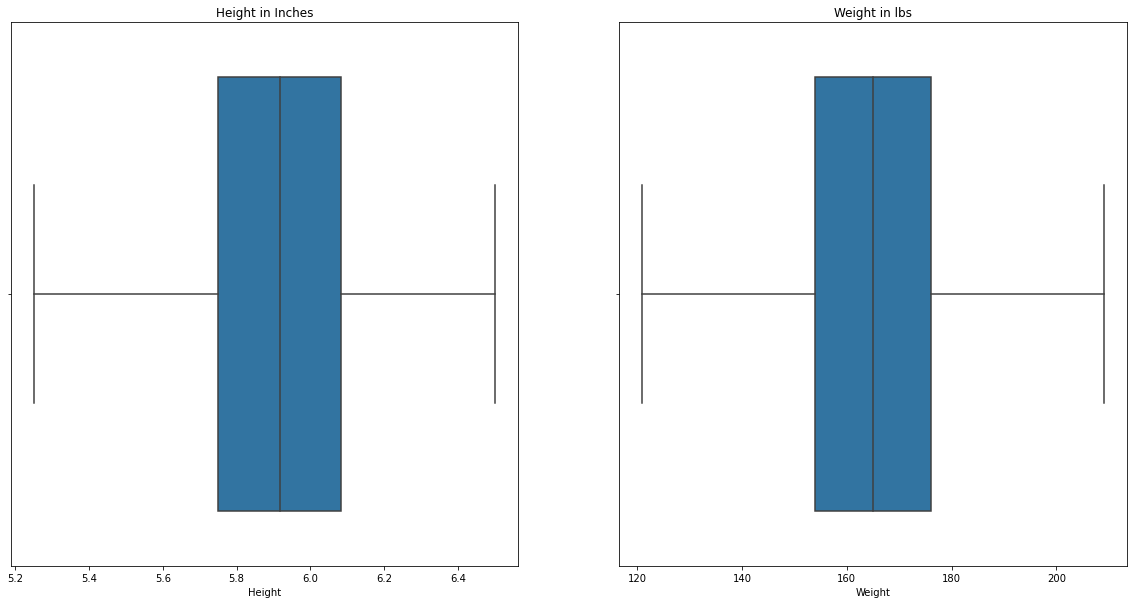

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['Height'])
plt.title('Height in Inches')

plt.subplot(1,2,2)
sns.boxplot(df['Weight'])
plt.title('Weight in lbs')

In [35]:
# we can further remove outliers to reduce the number of anomalies in the data but it would also reduce number of records

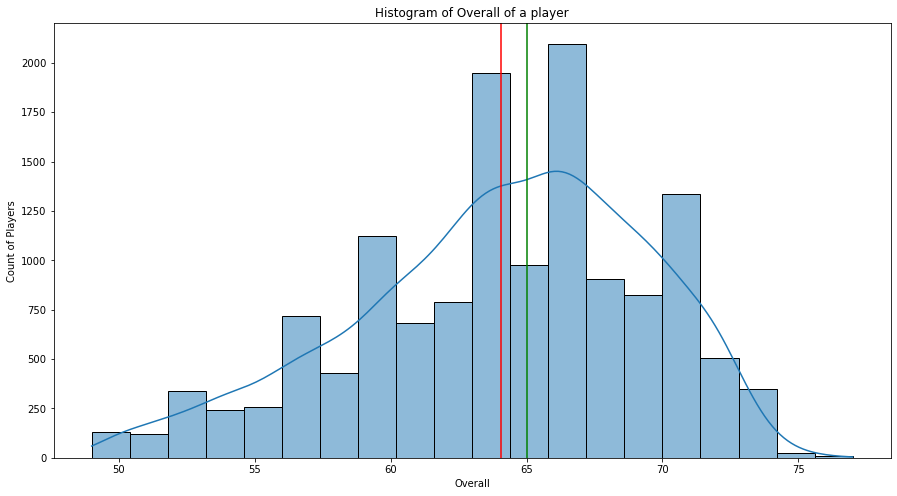

In [36]:
# histogram of Overall
plt.figure(figsize=(15,8))
sns.histplot(df['Overall'],bins=20,kde=True)
plt.title('Histogram of Overall of a player')
plt.xlabel('Overall')
plt.ylabel('Count of Players')
plt.axvline(df.Overall.mean(),color='red')
plt.axvline(df.Overall.median(),color='green')

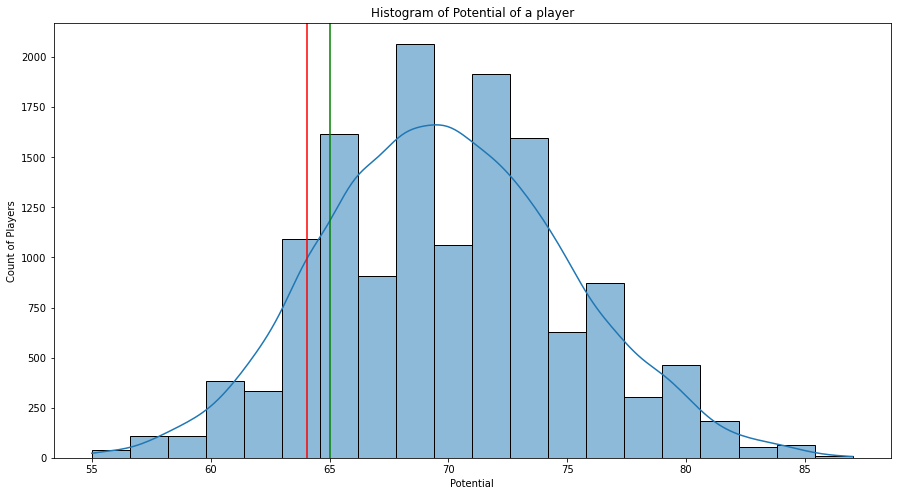

In [37]:
# histogram of Overall
plt.figure(figsize=(15,8))
sns.histplot(df['Potential'],bins=20,kde=True)
plt.title('Histogram of Potential of a player')
plt.xlabel('Potential')
plt.ylabel('Count of Players')
plt.axvline(df.Overall.mean(),color='red')
plt.axvline(df.Overall.median(),color='green')

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

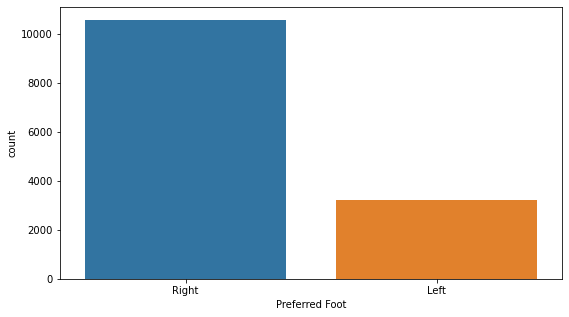

In [38]:
plt.figure(figsize=(9,5))
sns.countplot(df['Preferred Foot'])

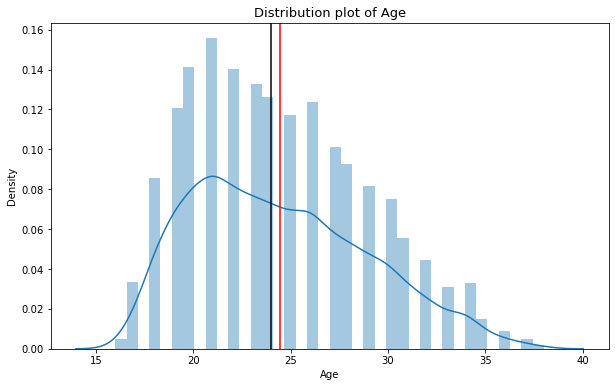

In [39]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'])
plt.axvline(df.Age.mean(),color='red')
plt.axvline(df.Age.median(),color='black')
plt.title('Distribution plot of Age',size=13)
plt.show()

In [40]:
# multivariate analysis

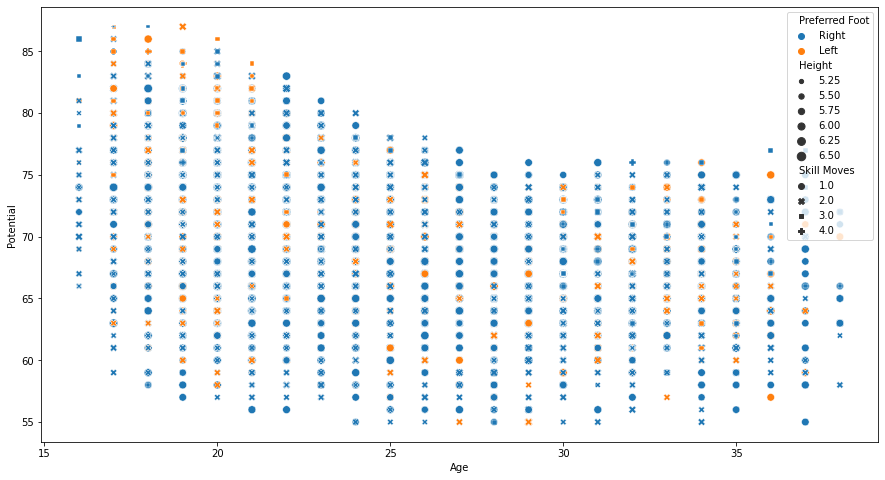

16

In [41]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Age'],y=df['Potential'],hue=df['Preferred Foot'],style=df['Skill Moves'],size=df['Height'])
plt.show()
df['Age'].min()

<AxesSubplot:xlabel='Preferred Foot', ylabel='Age'>

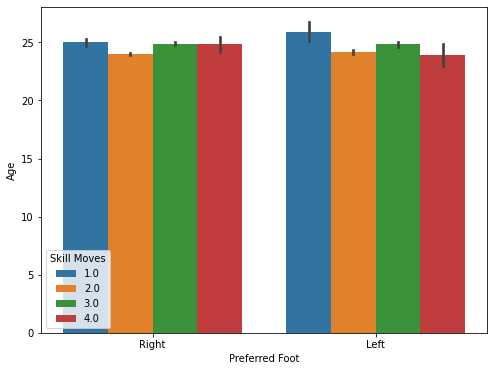

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Preferred Foot'],y=df['Age'],hue=df['Skill Moves'])

In [43]:
df.describe(include='object')

,Name,Nationality,Club,Preferred Foot,Position
count,13800,13800,13800,13800,13800
unique,13169,159,651,2,27
top,J. Rodríguez,England,UD Almería,Right,ST
freq,7,1343,30,10585,1695


<AxesSubplot:>

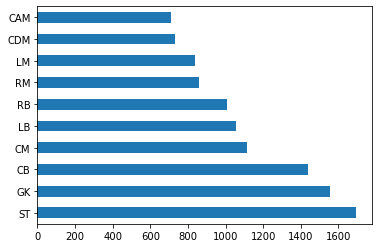

In [44]:
# What is the variation based on position

top_10_pos=df['Position'].value_counts().nlargest(10)
top_10_pos.plot(kind='barh')

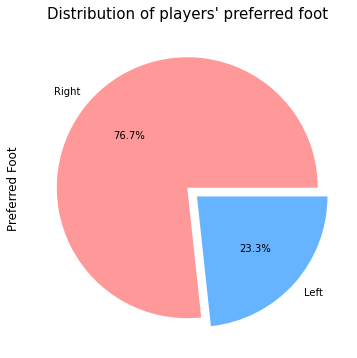

In [45]:
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df['Preferred Foot'].value_counts().plot(kind='pie',colors=colors,autopct='%0.1f%%',explode=[0,0.1])
plt.title("Distribution of players' preferred foot",size=15)
plt.ylabel('Preferred Foot',size=12)
plt.show()

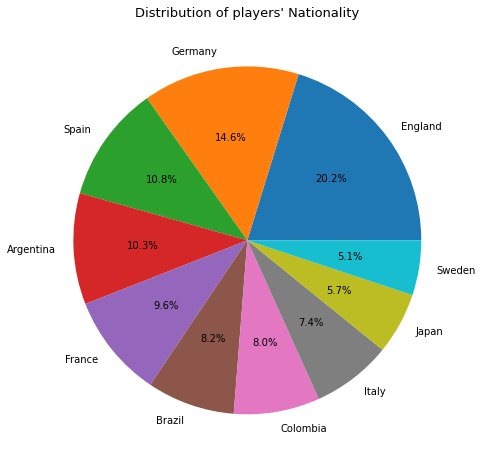

In [46]:
plt.figure(figsize=(8,8))
top_10_nat=df['Nationality'].value_counts().nlargest(10)
top_10_nat.plot(kind='pie',autopct='%0.1f%%')
plt.title("Distribution of players' Nationality",size=13)
plt.ylabel('')
plt.show()

### Checking for assumptions of Linear Regression

### Asusmptions are as follows
- 1. Target variable should be continuous numeric
- 2. Linear Relationship should be present between features and target variable
- 3. No MultiCollinearity should be present
- 4. No Autocorrelation should be present
- 5. Homoscedasticity should be present
- 6. Normality of residuals should be present

#### 1. Checking whether our target variable is continuous numeric

In [47]:
df['Value'].dtypes

dtype('float64')

##### As seen our target variable is of float data type
##### Hence our first assumption is validated

#### 2. Checking for linear relationship between Target Variable and Features 

<AxesSubplot:>

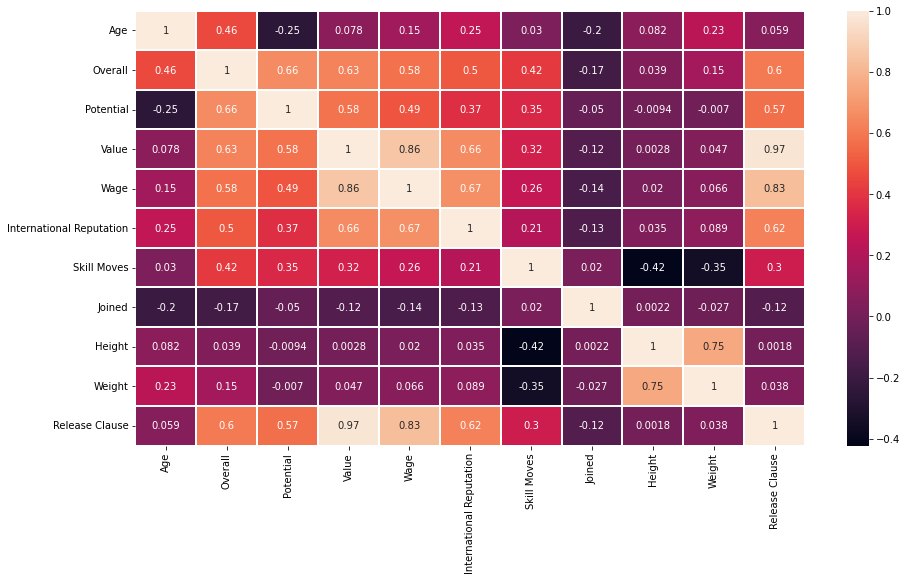

In [48]:
plt.figure(figsize=(15,8))
df_num_corr=sns.heatmap(df_num.corr(),annot=True,linewidths=0.1)
df_num_corr

In [49]:
# Looking at the above HeatMap, it can be observed that the features highly correlated (corr>=6) with target are
# Overall, Wage, International Reputation, Release Clause
# Though, to double check we will plot scatter plot of these features with our target

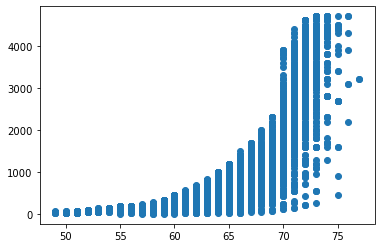

In [50]:
plt.scatter(df['Overall'],df['Value'])

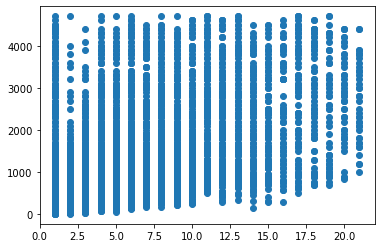

In [51]:
plt.scatter(df['Wage'],df['Value'])

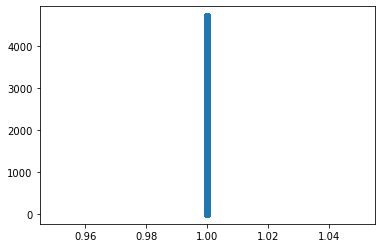

In [52]:
plt.scatter(df['International Reputation'],df['Value'])

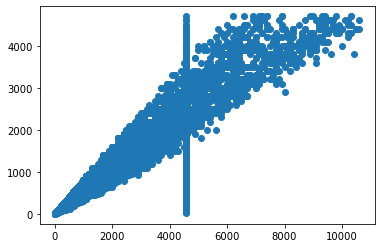

In [53]:
plt.scatter(df['Release Clause'],df['Value'])

#### Splitting the data into train set and test set

In [54]:
# sepereating our target variable from the rest of the data

X=df.drop(columns='Value',axis=1)
y=df.Value

In [55]:
# splitting the numerical and categorical data

X_num=X.select_dtypes(include='number')
X_cat=X.select_dtypes(include='object')

In [56]:
# Standardizing numerical data

ss=MinMaxScaler()
X_num_scaled = ss.fit_transform(X_num)

In [57]:
type(X_num_scaled)

numpy.ndarray

In [58]:
# we need to convert to X_num_scaled back to pandas dataframe from numpy array

X_num_scaled=pd.DataFrame(X_num_scaled,columns=X_num.columns,index=X_num.index)

In [59]:
# checking whether the data is standardized or not

X_num_scaled.describe()

,Age,Overall,Potential,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,13800.000000,13800.000000,13800.000000,13800.000000,13800.0,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000
mean,0.384216,0.537368,0.465358,0.145833,0.0,0.419855,0.764667,0.554937,0.501910,0.160504
std,0.206261,0.191527,0.161644,0.197834,0.0,0.223979,0.257822,0.173801,0.171503,0.170999
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.227273,0.428571,0.343750,0.000000,0.0,0.333333,0.600000,0.400000,0.375000,0.043638
50%,0.363636,0.571429,0.468750,0.050000,0.0,0.333333,0.800000,0.533333,0.500000,0.093039
75%,0.545455,0.678571,0.562500,0.200000,0.0,0.666667,1.000000,0.666667,0.625000,0.206574
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# dropping International Reputation as its min and max both is zero

X_num_scaled=X_num_scaled.drop(columns='International Reputation',axis=1)

X_num_scaled.head()

,Age,Overall,Potential,Wage,Skill Moves,Joined,Height,Weight,Release Clause
992,0.954545,1.000000,0.68750,0.10,0.666667,1.0,0.600000,0.602273,0.423822
1019,0.909091,1.000000,0.68750,0.95,0.666667,0.6,0.733333,0.431818,0.631624
1199,0.681818,0.964286,0.65625,0.80,0.000000,1.0,0.866667,0.977273,0.886653
1212,0.818182,0.964286,0.65625,1.00,0.000000,0.8,0.733333,0.534091,0.612733
1273,0.772727,0.964286,0.65625,0.15,0.666667,1.0,0.266667,0.329545,0.622178


In [61]:
# now we will encode categorical columns

In [62]:
X_cat.describe()

,Name,Nationality,Club,Preferred Foot,Position
count,13800,13800,13800,13800,13800
unique,13169,159,651,2,27
top,J. Rodríguez,England,UD Almería,Right,ST
freq,7,1343,30,10585,1695


In [63]:
# firstly we will drop name and contract valid columns as it is irrelevant and one
# hot encoding it will create more than 13000 columns

In [64]:
X_cat=X_cat.drop(columns='Name',axis=1)

X_cat.head()

,Nationality,Club,Preferred Foot,Position
992,Argentina,Deportivo Cali,Right,ST
1019,Spain,Getafe CF,Right,RS
1199,Sweden,MKE Ankaragücü,Right,GK
1212,Spain,CD Leganés,Left,GK
1273,Colombia,Deportivo Cali,Right,CAM


In [65]:
X_cat_encoded = pd.get_dummies(X_cat,drop_first=False,dtype=int)   # we use drop_first to avoid multicollinearity

In [66]:
X_cat_encoded.head()

,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Australia,Nationality_Austria,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
992,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X=pd.concat([X_num_scaled,X_cat_encoded],axis=1)
X.head()

,Age,Overall,Potential,Wage,Skill Moves,Joined,Height,Weight,Release Clause,Nationality_Afghanistan,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
992,0.954545,1.000000,0.68750,0.10,0.666667,1.0,0.600000,0.602273,0.423822,0,...,0,0,0,0,0,0,0,0,0,1
1019,0.909091,1.000000,0.68750,0.95,0.666667,0.6,0.733333,0.431818,0.631624,0,...,0,0,0,0,0,0,1,0,0,0
1199,0.681818,0.964286,0.65625,0.80,0.000000,1.0,0.866667,0.977273,0.886653,0,...,0,0,0,0,0,0,0,0,0,0
1212,0.818182,0.964286,0.65625,1.00,0.000000,0.8,0.733333,0.534091,0.612733,0,...,0,0,0,0,0,0,0,0,0,0
1273,0.772727,0.964286,0.65625,0.15,0.666667,1.0,0.266667,0.329545,0.622178,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y

992      3200.0
1019     3200.0
1199     4700.0
1212     3100.0
1273     4700.0
          ...  
18149      50.0
18150      50.0
18151      60.0
18152      50.0
18153      50.0
Name: Value, Length: 13800, dtype: float64

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10350, 848)
(3450, 848)
(10350,)
(3450,)


#### 3. Checking for multicollinearity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif=[]

In [73]:
for i in range(X_num_scaled.shape[1]):
    vif.append(variance_inflation_factor(X_num_scaled,i))

In [74]:
pd.DataFrame({'VIF':vif},index=X_num_scaled.columns[:])

,VIF
Age,16.367440
Overall,50.839205
Potential,24.559407
Wage,2.830953
Skill Moves,5.841019
Joined,8.408312
Height,24.524615
Weight,23.442083
Release Clause,4.668863


#### Inference:

- 1. As our highly correlated features (i.e., Wage and Release Clause) < 5 hence they are not violating multicollinearity assumption.
- 2. Overall has very high multicollinearity hence we will not include it in our model

### Linear Regression

##### Using sklearn

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
# from the heatmap plotted below we will select features which are highly correlated i.e., correlation 0.6 or above

<AxesSubplot:>

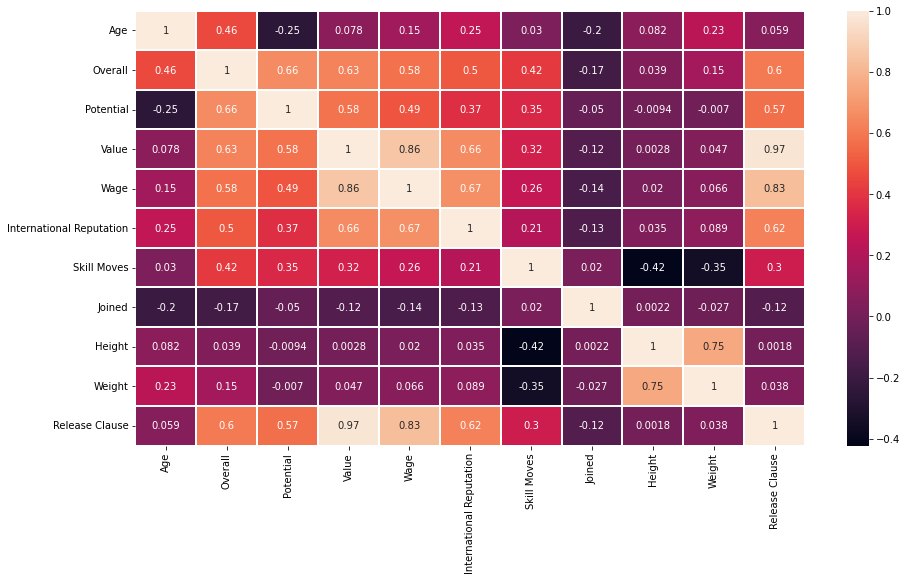

In [77]:
plt.figure(figsize=(15,8))
df_num_corr=sns.heatmap(df_num.corr(),annot=True,linewidths=0.1)
df_num_corr

In [78]:
# so our features which are highly correlated are Overall, International Reputation, Release Clause and Wage

In [79]:
lm=LinearRegression()

In [80]:
model_mlr = lm.fit(X_train[['Release Clause','Wage']],y_train)

In [81]:
# r square for the features

model_mlr.score(X_train[['Release Clause','Wage']],y_train)

0.7792055981266981

In [82]:
# b0, b1, and b2 coefficient 

model_mlr.intercept_,model_mlr.coef_

(86.95912887358679, array([4041.75025596,  817.22388754]))

In [83]:
# predicted y

yhat_train = model_mlr.predict(X_train[['Release Clause','Wage']])

In [84]:
# calculating yhat by using regression equation b0 + b1x1 + b2x2

yhat_train_calc = model_mlr.intercept_ +(model_mlr.coef_[0]*X_train['Release Clause']) + (model_mlr.coef_[1]*X_train['Wage'])

In [85]:
# checking actual y vs predicted y

yhat_train[0:10],yhat_train_calc[0:10]

(array([2729.60069014, 1914.13612557,  262.5712114 ,  586.34515865,
         426.73033203, 2074.63883225,  891.75747609,  180.10988569,
         381.30024981,  203.7793403 ]),
 3541     2729.600690
 15402    1914.136126
 12960     262.571211
 9459      586.345159
 15164     426.730332
 5455     2074.638832
 9407      891.757476
 17537     180.109886
 12705     381.300250
 15354     203.779340
 dtype: float64)

In [86]:
# calculating R square from scratch

In [87]:
# calculating sum of sqaures 

SST = sum((y_train - np.mean(y_train))**2)
SSE = sum((y_train - yhat_train)**2)
SSR = sum((yhat_train - np.mean(y_train))**2)

In [88]:
# calculating sum square of residuals + sum square of regressor

SSE+SSR

8490891123.874408

In [89]:
#sum square of totals

SST

8490891123.874315

In [90]:
model_mlr_r_sqr = SSR/SST

In [91]:
# calculated R square

model_mlr_r_sqr

0.7792055981267082

In [92]:
# calculated r square is the same as we obtianed from the model score

In [93]:
# predict y test using model

In [94]:
yhat_test = model_mlr.predict(X_test[['Release Clause','Wage']])

In [95]:
# compute mse on train and test

In [96]:
model_mlr_MSE_train = np.mean((y_train - yhat_train)**2)
model_mlr_MSE_test = np.mean((y_test - yhat_test)**2)
model_mlr_MSE_train, model_mlr_MSE_test

(181134.41807412214, 200657.45583643965)

In [97]:
# compute MAPE on train and test
model_mlr_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
model_mlr_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)

model_mlr_MAPE_train, model_mlr_MAPE_test

(44.579594780773654, 47.9409829415972)

In [98]:
model_mlr_performance = {'model':"model_mlr",'R Sq':model_mlr_r_sqr,'train_MSE':model_mlr_MSE_train,'test_MSE':model_mlr_MSE_test,'train_MAPE':model_mlr_MAPE_train,'test_MAPE':model_mlr_MAPE_test}

In [99]:
model_mlr_performance

{'model': 'model_mlr',
 'R Sq': 0.7792055981267082,
 'train_MSE': 181134.41807412214,
 'test_MSE': 200657.45583643965,
 'train_MAPE': 44.579594780773654,
 'test_MAPE': 47.9409829415972}

##### Using stats models

In [100]:
import statsmodels.api as sm

In [101]:
X_new_train = X_train[['Release Clause','Wage']]
X_new_test = X_test[['Release Clause','Wage']]

In [102]:
X_new_train = sm.add_constant(X_new_train)

In [103]:
X_new_train.head()

,const,Release Clause,Wage
3541,1.0,0.603287,0.25
15402,1.0,0.431856,0.10
12960,1.0,0.043450,0.00
9459,1.0,0.093228,0.15
15164,1.0,0.084065,0.00


In [104]:
sm_model = sm.OLS(y_train,X_new_train)
res = sm_model.fit()

In [105]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.826e+04
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:57:20   Log-Likelihood:                -77340.
No. Observations:               10350   AIC:                         1.547e+05
Df Residuals:                   10347   BIC:                         1.547e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             86.9591      5.786     15.030      0.000      75.618      98.300
Release Clause  4041.7503     31.493    128.338      0.000    3980.018    4103.483
Wage             817.2239     27.045     30.217      0.000     764.210     870.238
==============================================================================
Omnibus:                     2636.098   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21455.270
Skew:                          -0.995   Prob(JB):                         0.00
Kurtosis:                       9.767   Cond. No.                         9.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4. Autocorrelation

#### 5. Homoskedasticity

In [106]:
from statsmodels.stats.api import het_goldfeldquandt

In [107]:
gbq_test = het_goldfeldquandt(res.resid,X_new_train)
print('F-stat value: ',gbq_test[0])
print('p value: ',gbq_test[1])

F-stat value:  1.0511018516371688
p value:  0.03657075193996194


#### 
- 1. As p-value<0.05, we reject H0 and conclude that Variances are not equal across subgroups i.e., there is heteroskedasticity

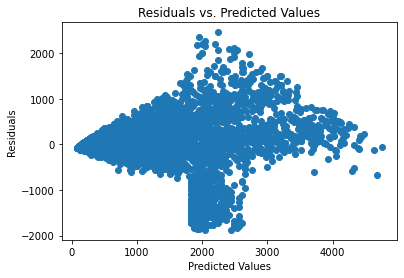

In [108]:
errors = res.resid
plt.scatter(res.fittedvalues, errors)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

#### 6. Normality of Residuals

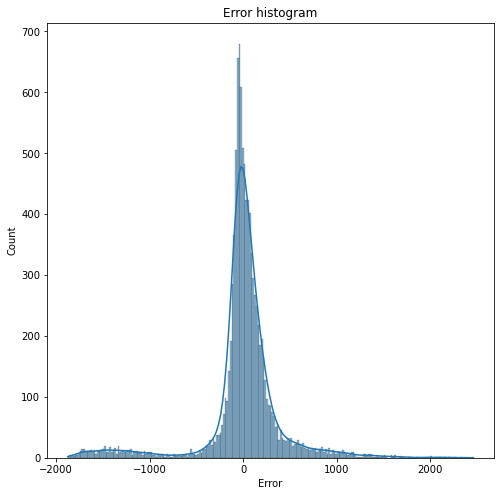

In [109]:
errors = res.resid
plt.figure(figsize=(8,8))
plt.title('Error histogram')
sns.histplot(errors,kde=True)
plt.xlabel("Error")
plt.show()

Other than the above mentioned tests, f-test and t-test are also performed in regression.

- 1. f-test assumptions:
-  H0 : Co-efficients of each of the features is equal to zero
-  Ha : Co-efficients of atleast one of the features is not equal to zero
    
- 2. Prob (F-statistic) in the above stats summary is 0.0. So co-efficient of atleast one of the feature is not equal to zero.

- 3. t-test is performed for each column.
  t-test assumptions:
-  H0 : Co-efficient of feature is equal to zero
-  Ha : Co-efficient of feature is not equal to zero